In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('mldata.csv')
df.drop('Unnamed: 0',1,inplace = True)
df.sample(5)

C:\Users\Frank\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,team,opponent,date,pace,result,wins,win_percentage,two_point_field_goals,two_point_field_goal_percentage,two_point_field_goal_attempts,turnovers,turnover_percentage,true_shooting_percentage,total_rebounds,total_rebound_percentage,three_point_field_goals,three_point_field_goal_percentage,three_point_field_goal_attempts,three_point_attempt_rate,steals,steal_percentage,ranking,points,personal_fouls,offensive_rebounds,offensive_rebound_percentage,offensive_rating,minutes_played,losses,free_throws,free_throw_percentage,free_throw_attempts,free_throw_attempt_rate,field_goals,field_goal_percentage,field_goal_attempts,effective_field_goal_percentage,defensive_rebounds,defensive_rating,blocks,block_percentage,assists,assist_percentage,opponent_wins,opponent_win_percentage,opponent_two_point_field_goals,opponent_two_point_field_goal_percentage,opponent_two_point_field_goal_attempts,opponent_turnovers,opponent_turnover_percentage,opponent_true_shooting_percentage,opponent_total_rebounds,opponent_total_rebound_percentage,opponent_three_point_field_goals,opponent_three_point_field_goal_percentage,opponent_three_point_field_goal_attempts,opponent_three_point_attempt_rate,opponent_steals,opponent_steal_percentage,opponent_ranking,opponent_points,opponent_personal_fouls,opponent_offensive_rebounds,opponent_offensive_rebound_percentage,opponent_offensive_rating,opponent_minutes_played,opponent_losses,opponent_free_throws,opponent_free_throw_percentage,opponent_free_throw_attempts,opponent_free_throw_attempt_rate,opponent_field_goals,opponent_field_goal_percentage,opponent_field_goal_attempts,opponent_effective_field_goal_percentage,opponent_defensive_rebounds,opponent_defensive_rating,opponent_blocks,opponent_block_percentage,opponent_assists,opponent_assist_percentage
61309,Iona,Monmouth,2019-01-03,76.7,1,3,0.250,14.0,0.636,22.0,12,15.0,0.745,34,56.7,17.0,0.548,31.0,0.585,8,10.4,0.0,103,24,5,20.8,133.8,200.0,9,24,0.706,34,0.642,31,0.585,53,0.745,29,24,3,8.1,18,58.1,1,0.071,18.0,0.486,37.0,10,12.0,0.566,26,43.3,10.0,0.455,22.0,0.373,4,5.2,0.0,84,25,7,19.4,109.1,200.0,13,18,0.563,32,0.542,28,0.475,59,0.559,19,18,5,22.7,12,42.9
46230,Mississippi Valley State,Southeastern Louisiana,2017-11-25,65.3,0,0,0.000,17.0,0.472,36.0,17,22.8,0.508,30,49.2,4.0,0.286,14.0,0.280,3,4.6,0.0,59,22,9,32.1,90.8,200.0,6,13,0.765,17,0.340,21,0.420,50,0.460,21,13,3,8.6,11,52.4,4,0.571,21.0,0.600,35.0,9,11.9,0.541,31,50.8,6.0,0.273,22.0,0.386,6,9.2,0.0,73,18,12,36.4,112.3,200.0,3,13,0.591,22,0.386,27,0.474,57,0.526,19,13,2,5.6,18,66.7
78732,Indiana State,Valparaiso,2020-02-29,62.9,1,18,0.621,20.0,0.556,36.0,6,8.7,0.562,34,52.3,7.0,0.350,20.0,0.357,6,9.5,0.0,71,11,7,22.6,112.7,200.0,11,10,0.667,15,0.268,27,0.482,56,0.545,27,10,1,2.8,16,59.3,16,0.516,15.0,0.417,36.0,10,14.2,0.477,31,47.7,7.0,0.350,20.0,0.357,2,3.2,0.0,58,15,7,20.6,92.1,200.0,15,7,0.700,10,0.179,22,0.393,56,0.455,24,7,2,5.6,15,68.2
75688,Cincinnati,SMU,2020-01-28,62.8,1,13,0.650,17.0,0.586,29.0,12,17.8,0.582,36,60.0,8.0,0.348,23.0,0.442,7,11.1,0.0,65,15,5,23.8,103.2,200.0,7,7,0.875,8,0.154,25,0.481,52,0.558,31,7,3,12.0,15,60.0,15,0.750,6.0,0.240,25.0,12,17.0,0.366,24,40.0,8.0,0.276,29.0,0.537,3,4.8,0.0,43,11,8,20.5,68.3,200.0,5,7,0.700,10,0.185,14,0.259,54,0.333,16,7,4,13.8,10,71.4
50838,South Carolina State,Maryland-Eastern Shore,2018-01-15,65.9,1,7,0.368,19.0,0.487,39.0,7,9.7,0.500,33,55.9,5.0,0.278,18.0,0.316,3,4.5,0.0,66,13,9,30.0,100.0,200.0,12,13,0.684,19,0.333,24,0.421,57,0.465,24,13,5,14.3,10,41.7,5,0.250,16.0,0.457,35.0,12,16.6,0.510,26,44.1,8.0,0.381,21.0,0.375,1,1.5,0.0,62,20,5,17.2,93.9,200.0,15,6,0.600,10,0.179,24,0.429,56,0.500,21,6,1,2.6,11,45.8


In [3]:
len(df)

79624

In [17]:
cols_to_drop = ['team','opponent','date','wins','points','opponent_points','two_point_field_goals','two_point_field_goal_attempts',
               'total_rebounds','three_point_field_goals','three_point_field_goal_attempts','steals','personal_fouls','offensive_rebounds',
               'minutes_played','losses','free_throws','free_throw_attempts','field_goals','field_goal_attempts','defensive_rebounds',
               'blocks','assists','opponent_wins','opponent_two_point_field_goals','opponent_two_point_field_goal_attempts','opponent_turnovers',
               'opponent_total_rebounds','opponent_three_point_field_goals','opponent_three_point_field_goal_attempts','opponent_steals',
               'opponent_personal_fouls','opponent_offensive_rebounds','opponent_minutes_played','opponent_losses','opponent_free_throws',
               'opponent_free_throw_attempts','opponent_field_goal_attempts','opponent_defensive_rebounds',
               'opponent_assists','opponent_field_goals','opponent_blocks','turnovers']
df.drop(columns=cols_to_drop,axis = 1,inplace = True)
df.sample(5)

,pace,result,win_percentage,two_point_field_goal_percentage,turnover_percentage,true_shooting_percentage,total_rebound_percentage,three_point_field_goal_percentage,three_point_attempt_rate,steal_percentage,ranking,offensive_rebound_percentage,offensive_rating,free_throw_percentage,free_throw_attempt_rate,field_goal_percentage,effective_field_goal_percentage,defensive_rating,block_percentage,assist_percentage,opponent_win_percentage,opponent_two_point_field_goal_percentage,opponent_turnover_percentage,opponent_true_shooting_percentage,opponent_total_rebound_percentage,opponent_three_point_field_goal_percentage,opponent_three_point_attempt_rate,opponent_steal_percentage,opponent_ranking,opponent_offensive_rebound_percentage,opponent_offensive_rating,opponent_free_throw_percentage,opponent_free_throw_attempt_rate,opponent_field_goal_percentage,opponent_effective_field_goal_percentage,opponent_defensive_rating,opponent_block_percentage,opponent_assist_percentage
76887,69.4,0,0.739,0.382,9.4,0.473,40.6,0.333,0.443,7.2,10.0,13.9,92.8,0.786,0.230,0.361,0.434,11,2.7,68.2,0.783,0.405,17.8,0.537,59.4,0.429,0.362,7.2,12.0,30.3,101.4,0.867,0.259,0.414,0.491,13,20.6,41.7
50726,75.7,0,0.222,0.429,16.5,0.476,43.8,0.370,0.435,6.6,0.0,20.9,89.5,0.400,0.323,0.403,0.484,8,5.7,68.0,0.556,0.343,17.7,0.572,56.3,0.522,0.397,6.6,0.0,29.7,106.6,0.778,0.466,0.414,0.517,21,17.1,50.0
5114,66.0,1,0.688,0.559,12.9,0.656,47.8,0.571,0.292,18.2,0.0,16.7,122.7,0.655,0.604,0.563,0.646,19,5.7,59.3,0.294,0.571,26.1,0.566,52.2,0.273,0.239,7.6,0.0,18.2,87.9,0.818,0.239,0.500,0.533,9,17.6,43.5
59436,70.6,1,0.444,0.576,16.5,0.597,56.9,0.375,0.492,7.0,0.0,47.1,119.7,0.846,0.200,0.477,0.569,11,2.8,48.4,0.400,0.722,25.3,0.720,43.1,0.364,0.234,11.3,0.0,23.5,115.5,0.857,0.447,0.638,0.681,18,3.0,56.7
62530,81.5,0,0.474,0.500,21.7,0.507,38.6,0.269,0.433,18.5,0.0,17.1,86.4,0.789,0.317,0.400,0.458,15,14.3,45.8,0.579,0.500,25.5,0.536,61.4,0.294,0.288,13.6,0.0,40.0,93.8,0.760,0.424,0.441,0.483,19,5.9,30.8


In [18]:
X = df.drop('result',1)
y = df.result

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = df.result)

C:\Users\Frank\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [19]:
clf = RandomForestClassifier(n_estimators = 500,verbose = 1,n_jobs = -1)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   16.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.9s finished


1.0

In [20]:
print(classification_report(y_test,clf.predict(X_test)))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9954
           1       0.99      0.99      0.99      9952

    accuracy                           0.99     19906
   macro avg       0.99      0.99      0.99     19906
weighted avg       0.99      0.99      0.99     19906



[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.3s finished


In [21]:
X_train.columns

Index(['pace', 'win_percentage', 'two_point_field_goal_percentage',
       'turnover_percentage', 'true_shooting_percentage',
       'total_rebound_percentage', 'three_point_field_goal_percentage',
       'three_point_attempt_rate', 'steal_percentage', 'ranking',
       'offensive_rebound_percentage', 'offensive_rating',
       'free_throw_percentage', 'free_throw_attempt_rate',
       'field_goal_percentage', 'effective_field_goal_percentage',
       'defensive_rating', 'block_percentage', 'assist_percentage',
       'opponent_win_percentage', 'opponent_two_point_field_goal_percentage',
       'opponent_turnover_percentage', 'opponent_true_shooting_percentage',
       'opponent_total_rebound_percentage',
       'opponent_three_point_field_goal_percentage',
       'opponent_three_point_attempt_rate', 'opponent_steal_percentage',
       'opponent_ranking', 'opponent_offensive_rebound_percentage',
       'opponent_offensive_rating', 'opponent_free_throw_percentage',
       'opponent_free

In [22]:
imp_dict = {key:[] for key in ('feature','importance')}
for feat,imp in zip(X_train.columns,clf.feature_importances_):
    imp_dict['feature'].append(feat)
    imp_dict['importance'].append(imp)
    
imp_df = pd.DataFrame.from_dict(imp_dict)
imp_df.sort_values('importance',ascending = False).head(20)

,feature,importance
29,opponent_offensive_rating,0.198603
11,offensive_rating,0.188910
4,true_shooting_percentage,0.085201
22,opponent_true_shooting_percentage,0.083256
32,opponent_field_goal_percentage,0.047400
14,field_goal_percentage,0.045977
15,effective_field_goal_percentage,0.041919
33,opponent_effective_field_goal_percentage,0.040139
1,win_percentage,0.029994
19,opponent_win_percentage,0.028772


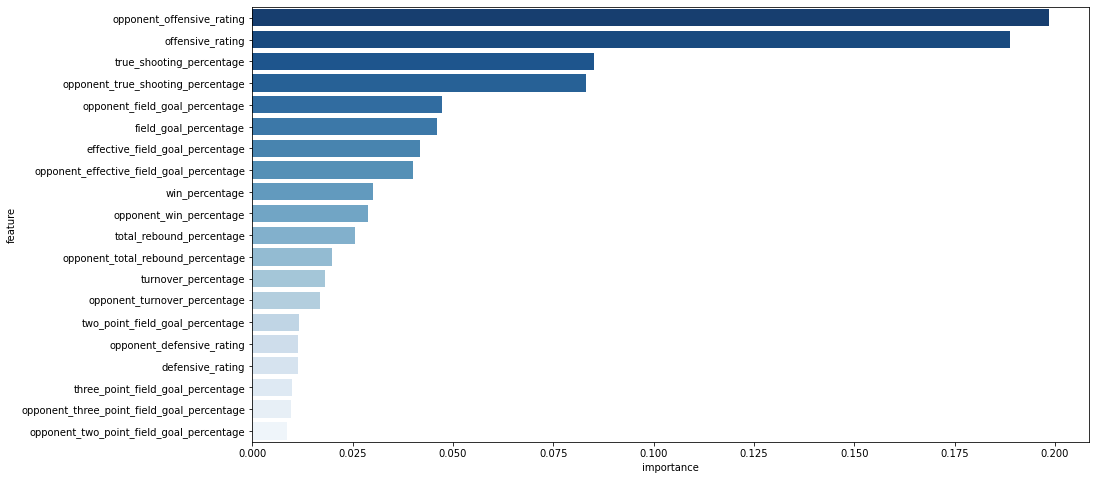

In [23]:
plt.figure(figsize = (15,8))
sns.barplot(data = imp_df.sort_values('importance',ascending = False).head(20),
           x = 'importance',
           y = 'feature',
           palette = "Blues_r");

In [ ]:
import shap
shap_values = shap.TreeExplainer(clf).shap_values(X_test)

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
shap.plots.beeswarm(shap_values)